In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV,cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')




In [2]:
school_df = pd.read_csv('../week 3 Task/new_data.csv', index_col=0)

X = school_df.drop('Target', axis=1).values
y = school_df['Target'].values
X


array([[ 1.        ,  1.09229759, -0.58029774, ...,  0.        ,
        -0.30941393, -0.21183237],
       [ 0.        , -0.14072283, -0.58029774, ...,  0.        ,
        -3.72994666, -0.21183237],
       [ 0.        , -0.50296612, -0.45457202, ...,  0.        ,
         0.13234811, -0.21183237],
       ...,
       [ 1.        ,  1.57993279,  0.80268511, ...,  0.        ,
         0.13234811,  0.37581341],
       [ 1.        ,  1.87948012, -0.45457202, ...,  0.        ,
        -0.58038093, -0.89021964],
       [ 1.        ,  1.75408822, -0.2031206 , ...,  0.        ,
         0.13234811, -0.21183237]])

In [3]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [4]:
X_train

array([[ 0.        ,  0.56983131, -0.70602345, ...,  0.        ,
         0.13234811,  0.89415372],
       [ 0.        , -0.47510125, -0.45457202, ...,  0.        ,
         0.90900442, -0.21183237],
       [ 1.        ,  1.57993279, -0.70602345, ...,  0.        ,
         0.48508828, -0.21183237],
       ...,
       [ 1.        ,  1.61476388, -0.45457202, ...,  0.        ,
        -0.30941393, -0.89021964],
       [ 0.        ,  0.09612855,  2.18566796, ...,  0.        ,
         1.9282129 ,  3.14219829],
       [ 0.        ,  0.84847999,  2.05994224, ...,  0.        ,
        -3.72994666, -0.89021964]])

In [5]:
y_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

## Logistic Regression

In [6]:
logreg = LogisticRegression()

In [7]:
# Performing cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.91696751 0.93478261 0.93115942 0.93478261 0.9057971  0.89492754
 0.93115942 0.9384058  0.92753623 0.92028986]
Mean cross-validation score: 0.9235808088735415


In [8]:
logreg.fit(X_train,y_train)
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)
logreg_pred_proba=logreg.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(train_pred,y_train))
print('testing accuracy: ',accuracy_score(test_pred,y_test))

training accuracy:  0.931546541108294
testing accuracy:  0.9305354558610709


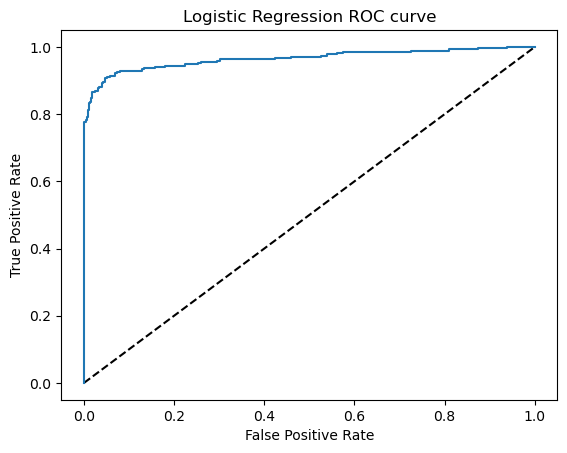

In [9]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,logreg_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [10]:
# Calculating the area under the curve
roc_auc_score(y_test,logreg_pred_proba)

0.964618397374828

In [11]:
print("Confusion matrix:\n", confusion_matrix(y_test, test_pred))
print("Classification report:\n", classification_report(y_test, test_pred))

Confusion matrix:
 [[410  13]
 [ 35 233]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       423
           1       0.95      0.87      0.91       268

    accuracy                           0.93       691
   macro avg       0.93      0.92      0.93       691
weighted avg       0.93      0.93      0.93       691



In [12]:
def plot_learning_curve(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)
   
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training scores")
    plt.plot(train_sizes, test_mean, label="Testing scores")

    plt.title(f'{model} Learning curve')
    plt.xlabel('Training size')
    plt.ylabel('Accuracy score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    

[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   22.7s finished


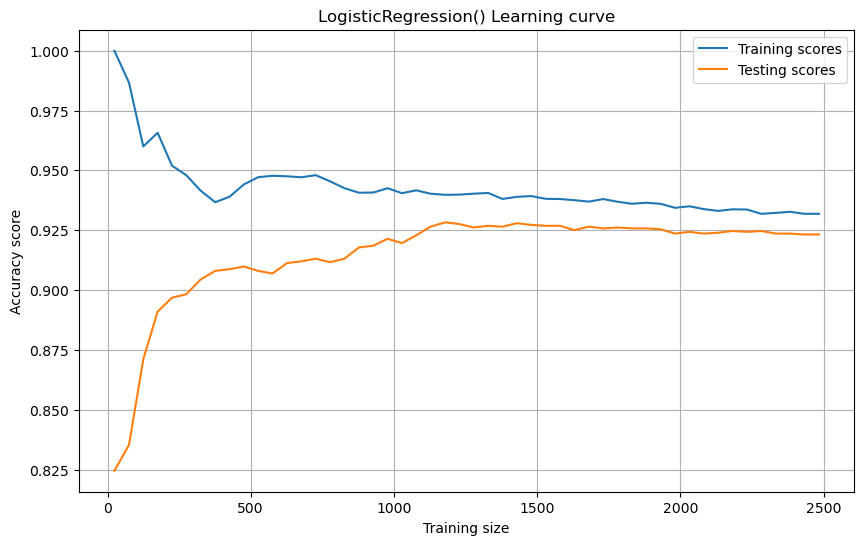

In [13]:
plot_learning_curve(logreg)

## Traditional Machine Learning Models  
1. Decision Trees
2. Random Forests
3. Support Vector Machines
4. Gradient Boosting Machines (e.g., XGBmances

## Decision Tree Classifier

In [14]:
dt = DecisionTreeClassifier()

In [15]:
# Performing cross-validation
dt_scores = cross_val_score(dt, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", dt_scores)
print("Mean cross-validation score:", np.mean(dt_scores))

Cross-validation scores: [0.86281588 0.87681159 0.86956522 0.84782609 0.82608696 0.85869565
 0.89130435 0.90217391 0.89855072 0.83333333]
Mean cross-validation score: 0.8667163710563492


In [16]:
dt.fit(X_train,y_train)
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)
dt_pred_proba=dt.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(dt_train_pred,y_train))
print('testing accuracy: ',accuracy_score(dt_test_pred,y_test))

training accuracy:  1.0
testing accuracy:  0.8523878437047757


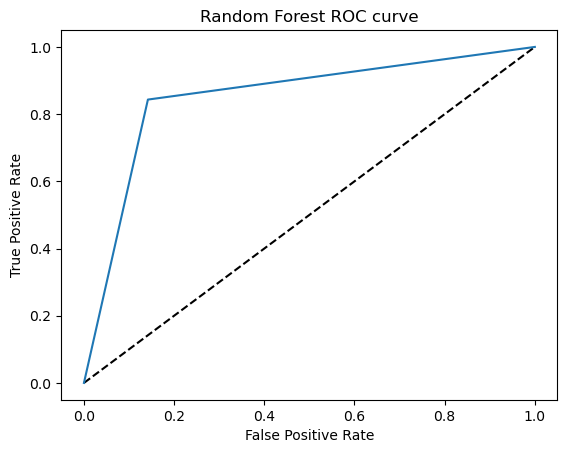

In [17]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,dt_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [18]:
# Calculating the area under the curve
roc_auc_score(y_test,dt_pred_proba)

0.8507198052291732

In [19]:
print("Confusion matrix:\n", confusion_matrix(y_test, dt_test_pred))
print("Classification report:\n", classification_report(y_test, dt_test_pred))

Confusion matrix:
 [[363  60]
 [ 42 226]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       423
           1       0.79      0.84      0.82       268

    accuracy                           0.85       691
   macro avg       0.84      0.85      0.85       691
weighted avg       0.86      0.85      0.85       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.0s finished


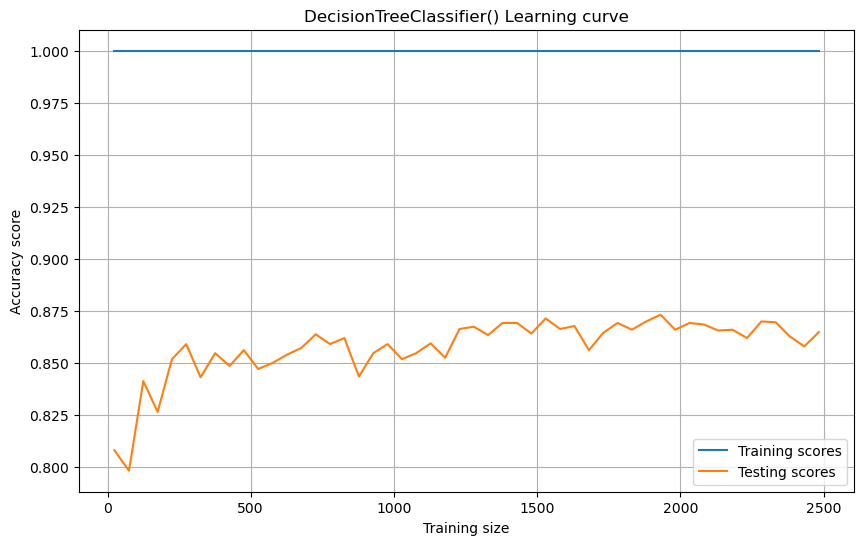

In [20]:
plot_learning_curve(dt)

## Support Vector Machine

In [21]:
svm = SVC()

In [22]:
# Performing cross-validation
svm_scores = cross_val_score(svm, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", svm_scores)
print("Mean cross-validation score:", np.mean(svm_scores))

Cross-validation scores: [0.92418773 0.92753623 0.92028986 0.92753623 0.9057971  0.89130435
 0.92391304 0.92028986 0.91304348 0.90942029]
Mean cross-validation score: 0.9163318160414378


In [23]:
svm.fit(X_train,y_train)
svm_train_pred = svm.predict(X_train)
svm_test_pred = svm.predict(X_test)
print('training accuracy: ',accuracy_score(svm_train_pred,y_train))
print('testing accuracy: ',accuracy_score(svm_test_pred,y_test))

training accuracy:  0.925751539297356
testing accuracy:  0.9204052098408104


In [24]:
print("Confusion matrix:\n", confusion_matrix(y_test, svm_test_pred))
print("Classification report:\n", classification_report(y_test, svm_test_pred))

Confusion matrix:
 [[413  10]
 [ 45 223]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       423
           1       0.96      0.83      0.89       268

    accuracy                           0.92       691
   macro avg       0.93      0.90      0.91       691
weighted avg       0.92      0.92      0.92       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


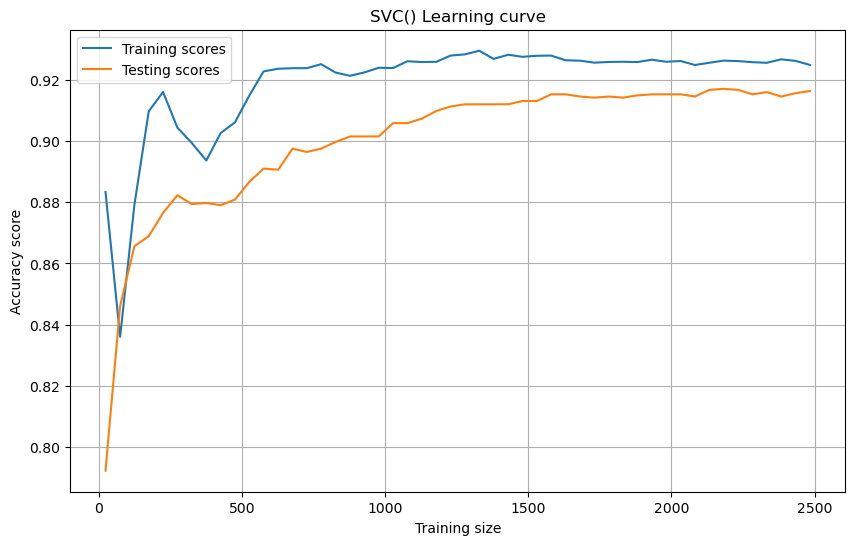

In [25]:
plot_learning_curve(svm)

## Random Forest Classifier

In [26]:
rf = RandomForestClassifier()

In [27]:
# Performing cross-validation
rf_scores = cross_val_score(rf, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", rf_scores)
print("Mean cross-validation score:", np.mean(rf_scores))

Cross-validation scores: [0.90613718 0.92753623 0.92753623 0.9384058  0.90942029 0.90217391
 0.9384058  0.91666667 0.91666667 0.90942029]
Mean cross-validation score: 0.9192369068173495


In [28]:
rf.fit(X_train,y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
rf_pred_proba=rf.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(rf_train_pred,y_train))
print('testing accuracy: ',accuracy_score(rf_test_pred,y_test))

training accuracy:  1.0
testing accuracy:  0.918958031837916


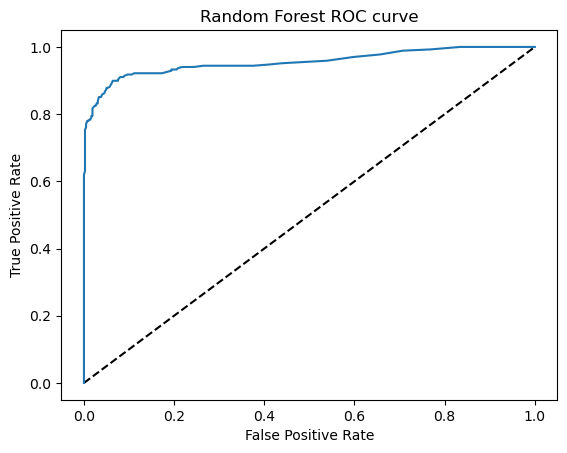

In [29]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,rf_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [30]:
# Calculating the area under the curve
roc_auc_score(y_test,rf_pred_proba)

0.9548136974700965

In [31]:
print("Confusion matrix:\n", confusion_matrix(y_test, rf_test_pred))
print("Classification report:\n", classification_report(y_test, rf_test_pred))

Confusion matrix:
 [[410  13]
 [ 43 225]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       423
           1       0.95      0.84      0.89       268

    accuracy                           0.92       691
   macro avg       0.93      0.90      0.91       691
weighted avg       0.92      0.92      0.92       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


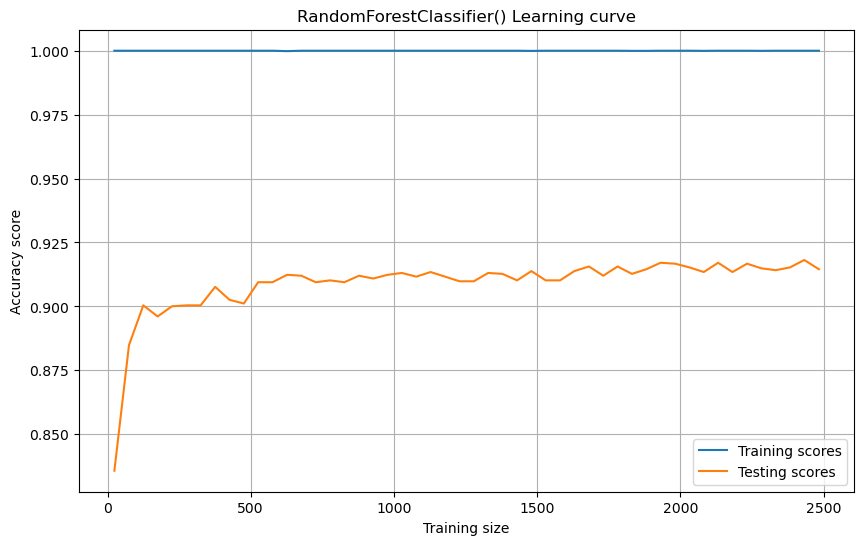

In [32]:
plot_learning_curve(rf)

## Gradient Boosting Classifier

In [33]:
gbt = GradientBoostingClassifier()

In [34]:
# Performing cross-validation
gbt_scores = cross_val_score(gbt, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", gbt_scores)
print("Mean cross-validation score:", np.mean(gbt_scores))

Cross-validation scores: [0.9133574  0.92753623 0.93115942 0.93115942 0.89492754 0.90217391
 0.93478261 0.90217391 0.92753623 0.93115942]
Mean cross-validation score: 0.9195966096374196


In [35]:
gbt.fit(X_train,y_train)
gbt_train_pred = gbt.predict(X_train)
gbt_test_pred = gbt.predict(X_test)
gbt_pred_proba=gbt.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(gbt_train_pred,y_train))
print('testing accuracy: ',accuracy_score(gbt_test_pred,y_test))

training accuracy:  0.9518290474465774
testing accuracy:  0.9305354558610709


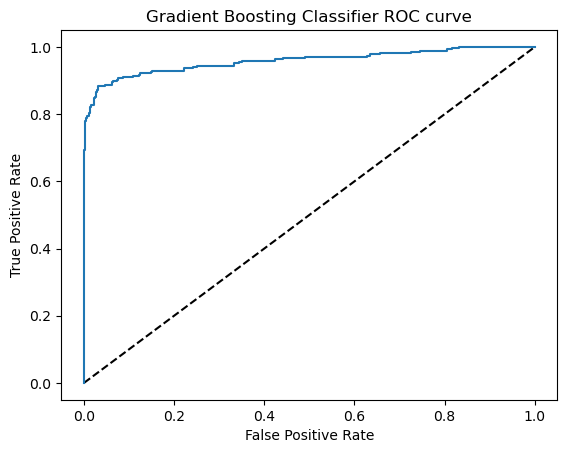

In [36]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,gbt_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC curve')
plt.show()

In [37]:
# Calculating the area under the curve
roc_auc_score(y_test,gbt_pred_proba)

0.9581701421968173

In [38]:
print("Confusion matrix:\n", confusion_matrix(y_test, gbt_test_pred))
print("Classification report:\n", classification_report(y_test, gbt_test_pred))

Confusion matrix:
 [[411  12]
 [ 36 232]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       423
           1       0.95      0.87      0.91       268

    accuracy                           0.93       691
   macro avg       0.94      0.92      0.93       691
weighted avg       0.93      0.93      0.93       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.9min finished


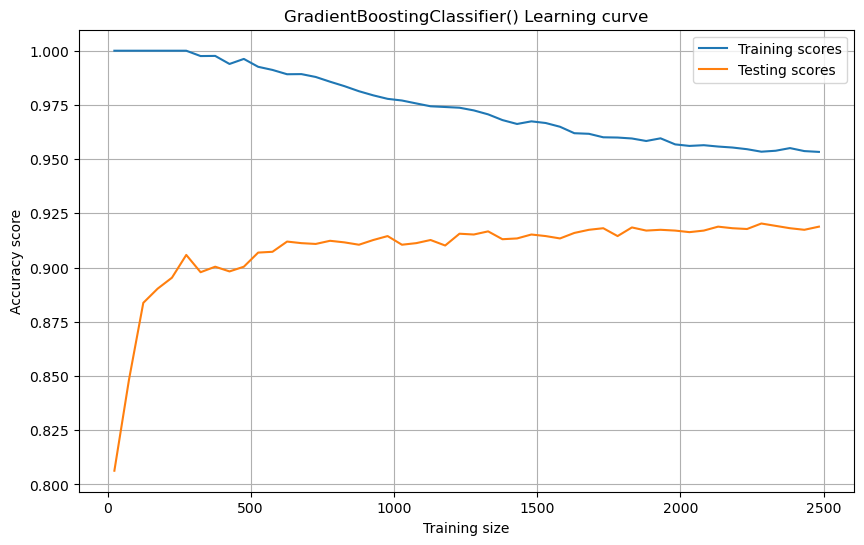

In [39]:
plot_learning_curve(gbt)

# XGBCLASSIFIER

In [40]:
xgb = XGBClassifier()

In [41]:
# Performing cross-validation
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", xgb_scores)
print("Mean cross-validation score:", np.mean(xgb_scores))

Cross-validation scores: [0.9133574  0.91666667 0.92391304 0.92391304 0.89492754 0.89492754
 0.92753623 0.92391304 0.92753623 0.91304348]
Mean cross-validation score: 0.9159734212316224


In [42]:
xgb.fit(X_train,y_train)
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)
xgb_pred_proba=xgb.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(xgb_train_pred,y_train))
print('testing accuracy: ',accuracy_score(xgb_test_pred,y_test))

training accuracy:  1.0
testing accuracy:  0.9319826338639653


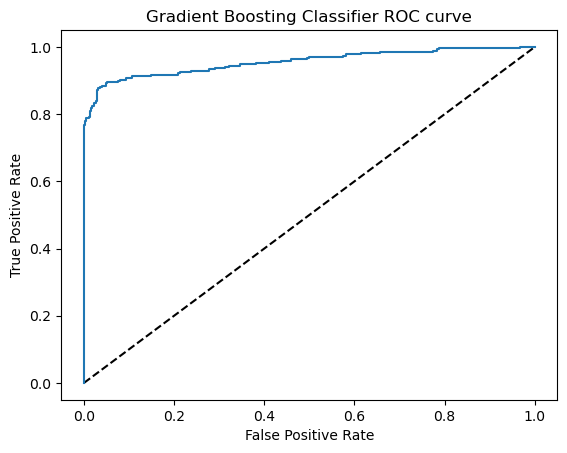

In [43]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,xgb_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC curve')
plt.show()

In [44]:
roc_auc_score(y_test,xgb_pred_proba)

0.9551885960269574

In [45]:
print("Confusion matrix:\n", confusion_matrix(y_test, xgb_test_pred))
print("Classification report:\n", classification_report(y_test, xgb_test_pred))

Confusion matrix:
 [[410  13]
 [ 34 234]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       423
           1       0.95      0.87      0.91       268

    accuracy                           0.93       691
   macro avg       0.94      0.92      0.93       691
weighted avg       0.93      0.93      0.93       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   55.9s finished


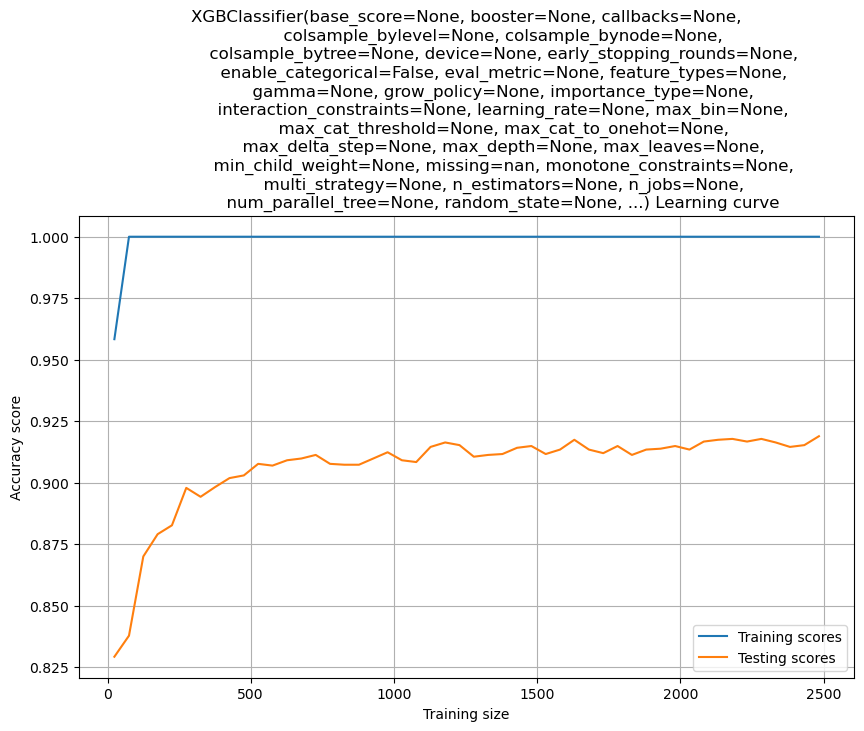

In [46]:
plot_learning_curve(xgb)

## Deep Learning Models 
1.  Design and implement a neural network architecture2. • Train the neural network using TensorFlow or PyTorc3. 
• Experiment with different architectures (e.g., number of layers, neurons)


In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [48]:
# Create a model class that inherits the nn.Module

class Model(nn.Module):
    def __init__(self, in_features=74, h1=25, h2=20, h3=15, h4=10, output_features=2):
        super().__init__()   # Instantiate our nn.Module
        self.fc1=nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.fc4 = nn.Linear(h3,h4)
        self.out= nn.Linear(h4,output_features)

    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.relu(self.fc4(x))
        x= self.out(x)

        return x

In [49]:
# Pick a random seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [50]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels to tensors long(int)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#  Setthe criterion of model to measure the error
criterion = CrossEntropyLoss()

# Set the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [51]:
# Train our model
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')
    i+=1

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2761x76 and 29x25)

Text(0.5, 0, 'Epochs')

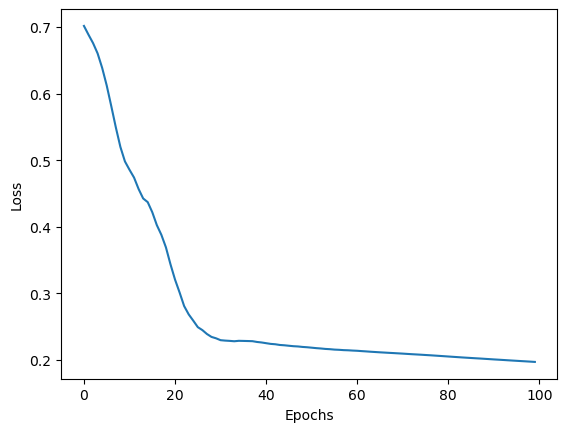

In [52]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [53]:
# Evaluate Model on Test Data Set
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(f'Loss: {loss}')

Loss: 0.23724135756492615


In [54]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    print(f'{i+1}. {str(y_val)} \t {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1. tensor([-10.2732,   5.9763]) 	 1
2. tensor([ 1.3323, -1.7252]) 	 0
3. tensor([-1.3789,  1.1070]) 	 1
4. tensor([ 0.2910, -0.3387]) 	 0
5. tensor([-2.3734,  1.6717]) 	 1
6. tensor([ 1.4258, -1.9043]) 	 0
7. tensor([ 0.2000, -0.0783]) 	 1
8. tensor([-4.2974,  2.7209]) 	 1
9. tensor([ 1.7393, -2.2083]) 	 0
10. tensor([-1.5566,  1.2215]) 	 1
11. tensor([-5.7170,  3.4955]) 	 1
12. tensor([ 1.5752, -2.2169]) 	 0
13. tensor([ 0.1364, -0.1258]) 	 0
14. tensor([-9.0468,  5.3061]) 	 1
15. tensor([ 1.2838, -1.6217]) 	 0
16. tensor([ 1.5051, -1.9759]) 	 0
17. tensor([-2.9640,  1.9961]) 	 1
18. tensor([ 1.2720, -1.6844]) 	 1
19. tensor([ 1.3141, -1.6934]) 	 1
20. tensor([ 1.3846, -1.8500]) 	 0
21. tensor([-5.1127,  3.1661]) 	 1
22. tensor([ 1.4647, -1.8475]) 	 0
23. tensor([-6.5990,  3.9761]) 	 1
24. tensor([ 0.9884, -1.3375]) 	 1
25. tensor([ 1.2181, -1.5845]) 	 0
26. tensor([ 1.8286, -2.3774]) 	 0
27. tensor([-11.2299,   6.4966]) 	 1
28. tensor([ 1.5231, -2.0803]) 	 0
29. tensor([ 1.7944, -2.5

In [55]:
torch.save(model.state_dict(), 'my_pytorch_model.pt')

In [56]:
import pickle
with open('logisticRegression_model', 'wb' ) as LR:
    pickle.dump(logreg,LR)

with open('RandomForestClassifier_model', 'wb' ) as RFC:
    pickle.dump(rf,RFC)

with open('DecisionTreeClassifier_model', 'wb' ) as DTC:
    pickle.dump(dt,DTC)

with open('SVM_model', 'wb' ) as SVM:
    pickle.dump(svm,SVM)

with open('GradientBoostClassifier_model', 'wb' ) as GBC:
    pickle.dump(gbt,GBC)